In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from scipy import stats

import joblib

import warnings
warnings.filterwarnings('ignore')

## General Insights

In [122]:
df = pd.read_csv('car_price_prediction.csv')

In [123]:
df.shape

(19237, 18)

In [124]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

We need to deal with Levy, Engine volume, Mileage and doors column as they are stored as object but resemble float or integer

In [126]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

 The data we imported has 19237 rows and 18 columns. Seems like we don't have any null value from info() method but actually in Levy column the null values entered as '-' so we had to change them to null values. We will handle this problem soon.

In [127]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [128]:
desc = ['Price','Levy','Mileage' ,'Prod. year', 'Cylinders', 'Airbags']
df[desc].describe()

,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,4.582991,6.582627
std,1.905813e+05,5.668673,1.199933,4.320168
min,1.000000e+00,1939.000000,1.000000,0.000000
25%,5.331000e+03,2009.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,4.000000,6.000000
75%,2.207500e+04,2015.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,16.000000,16.000000


# Explotory Data Analysis and Data Cleaning 

Let's start checking the unique values for each attributes

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [130]:
df.columns[5]

'Prod. year'

In [131]:
for i in df.columns:
    print(i)

ID
Price
Levy
Manufacturer
Model
Prod. year
Category
Leather interior
Fuel type
Engine volume
Mileage
Cylinders
Gear box type
Drive wheels
Doors
Wheel
Color
Airbags


In [132]:
type(df.Levy[1])

str

Cleaning Levy

In [133]:
df.Levy.unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [134]:
df[df['Levy'] == '-']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
11,45814819,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0
12,45815568,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.0,Manual,Front,04-May,Left wheel,White,4
23,45814106,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,02-Mar,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,44571028,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0 km,4.0,Automatic,Front,04-May,Left wheel,Blue,4
19224,45768089,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
19226,45796788,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6


As I mentioned earlier we had the '-' values in the Levy column which used instead of null values. We have 5819 of them! We will replace them with null for now and will handle what to imput there later on.

In [135]:
df1=df.copy()

In [136]:
df1.Levy=df1.Levy.replace('-',np.nan)

In [137]:
df1.head() 

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [138]:
# Replacing '-' with null
df['Levy'].replace({'-':np.nan}, inplace = True)

In [139]:
# Converting Levy type to float
df['Levy'] = df['Levy'].astype('float64')

In [140]:
x=['3',2,True]

In [141]:
x=pd.DataFrame(x)
x

,0
0,3
1,2
2,True


In [142]:
type(x)

pandas.core.frame.DataFrame

In [143]:
x.astype('float64')

,0
0,3.0
1,2.0
2,1.0


In [144]:
x[0]

0       3
1       2
2    True
Name: 0, dtype: object

In [145]:
x[0].replace({'3': 45, 2:False})

0       45
1    False
2     True
Name: 0, dtype: object

Cleaning Leather Interior Column

In [146]:
# Replacement: Yes >> True , No >> False
df['Leather interior'].replace({'Yes': True, 'No':False}, inplace=True)

Cleaning Engine Volume Column

In [147]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

We want to convert the Engine column type to float in order to do that we need to strip the 'turbo' word in them. Also, we will make new column which is Turbo , will indicate that if the car has turbo or not (True and False).

In [148]:
# Making sure that we don miss anything so making everything lower first
df['Engine volume'] = df['Engine volume'].str.lower()

In [149]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 turbo', '2.2 turbo', '4.7', '1.5', '4.4', '3.0 turbo',
       '1.4 turbo', '3.6', '2.3', '1.5 turbo', '1.6 turbo', '2.2',
       '2.3 turbo', '1.4', '5.5', '2.8 turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 turbo', '2.4 turbo', '3.5 turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 turbo', '3.7', '1', '2.5 turbo', '2.6',
       '1.9 turbo', '4.4 turbo', '4.7 turbo', '0.8', '0.2 turbo', '5.7',
       '4.8 turbo', '4.6 turbo', '6.7', '6.2', '1.2 turbo', '3.4',
       '1.7 turbo', '6.3 turbo', '2.7 turbo', '4.3', '4.2', '2.9 turbo',
       '0', '4.0 turbo', '20', '3.6 turbo', '0.3', '3.7 turbo', '5.9',
       '5.5 turbo', '0.2', '2.1 turbo', '5.6', '6', '0.7 turbo',
       '0.6 turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 turbo', '6.3',
       '4.5 turbo', '0.8 turbo', '4.2 turbo', '3.1', '5.0 turbo', '6.4',
       '3

In [150]:
df['Engine volume'].str.contains('turbo')

0        False
1        False
2        False
3        False
4        False
         ...  
19232     True
19233    False
19234    False
19235    False
19236    False
Name: Engine volume, Length: 19237, dtype: bool

In [151]:
# Finding the rows which has turbo in them and assigning the results to new column Turbo. 
df['Turbo'] = df['Engine volume'].str.contains('turbo')

In [152]:
df['Engine volume']

0              3.5
1                3
2              1.3
3              2.5
4              1.3
           ...    
19232    2.0 turbo
19233          2.4
19234            2
19235            2
19236          2.4
Name: Engine volume, Length: 19237, dtype: object

In [153]:
df['Engine volume'].str.slice(0,3)

0        3.5
1          3
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234      2
19235      2
19236    2.4
Name: Engine volume, Length: 19237, dtype: object

In [154]:
# Slicing engine volumes and converting type to float
df['Engine volume'] = df['Engine volume'].str.slice(0,3)

In [155]:
df['Engine volume'] = df['Engine volume'].astype('float64')

Cleaning Mileage

In [156]:
df['Mileage']

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: Mileage, Length: 19237, dtype: object

In [157]:
df['Mileage'] = df['Mileage'].str.strip('km')
df['Mileage']

0        186005 
1        192000 
2        200000 
3        168966 
4         91901 
          ...   
19232    300000 
19233    161600 
19234    116365 
19235     51258 
19236    186923 
Name: Mileage, Length: 19237, dtype: object

In [158]:
df['Mileage'] = df['Mileage'].astype('int64')

Cleaning Doors

In [159]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [160]:
df['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace=True)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              13418 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  bool   
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  float64
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  int64  
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

We have succesfully converted all columns to apt data type and removed redundancies

In [162]:
cars = df.drop('ID', axis=1)

In [163]:
cars.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,8467,NaN,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False


In [164]:
cars[cars.Price == cars.Price.max()]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
16983,26307500,NaN,OPEL,Combo,1999,Goods wagon,False,Diesel,1.7,99999,4.0,Manual,Front,2,Left wheel,Blue,0,False


## Outlier removal using IQR Method

In [165]:
def detect_outliers(df,features,thold):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * thold
        # Detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indeces
        outlier_indices.extend(outlier_list_col)
    
    
    return outlier_indices

In [166]:
features = ['Price', 'Levy', 'Mileage']
outliers = detect_outliers(cars,features, 1.5)

In [167]:
outliers[0:5]

[14, 36, 47, 56, 73]

In [168]:
deleted_df = cars.drop(cars.loc[outliers].index,axis=0)

In [169]:
df.shape

(19237, 19)

In [228]:
deleted_df.shape

(17527, 18)

## Visualizations

### Most expensive cars by manufacturers

In [238]:
deleted_df.groupby('Manufacturer')[['Price']].mean().sort_values(by='Price',ascending=False).head(10)

,Price
Manufacturer,
SSANGYONG,29697.406699
HUMMER,23332.750000
LAND ROVER,20980.166667
INFINITI,20298.068966
MASERATI,20149.500000
JEEP,20086.317073
HYUNDAI,19801.453579
სხვა,17248.500000
MINI,16412.489362


In [244]:
most_expensive=deleted_df.groupby('Manufacturer')[['Price']].median().sort_values(by='Price',ascending=False).head(10)

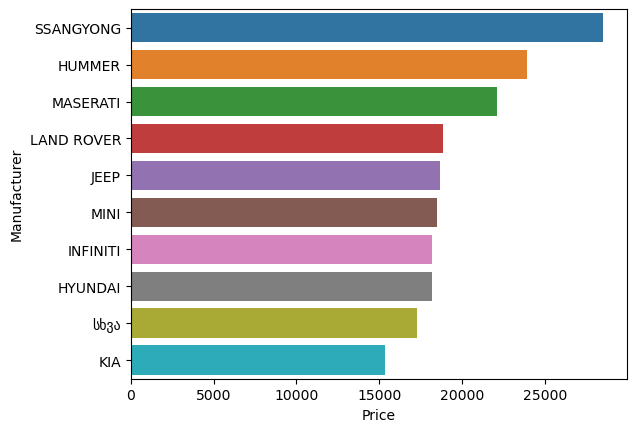

In [245]:
sns.barplot(data=most_expensive,y=most_expensive.index,x='Price');

### Most expensive cars by category

In [247]:
deleted_df.groupby('Category')[['Price']].median().sort_values(by='Price',ascending=False)

,Price
Category,
Pickup,19056.5
Minivan,17249.0
Universal,16833.0
Jeep,15681.0
Microbus,15524.0
Cabriolet,13956.0
Coupe,13172.0
Sedan,11917.0
Hatchback,10349.0


In [248]:
most_expensive_cat=deleted_df.groupby('Category')[['Price']].median().sort_values(by='Price',ascending=False)

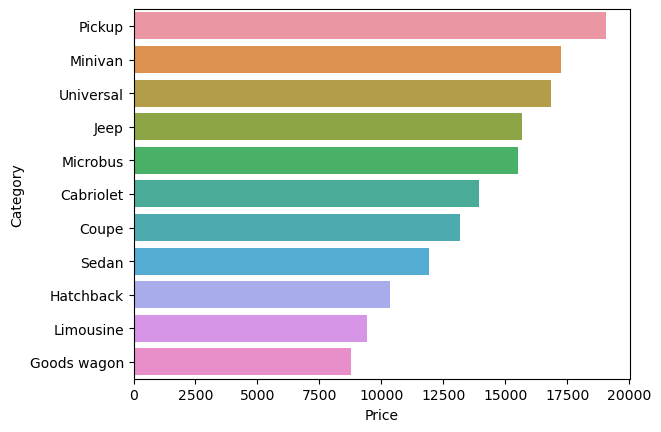

In [249]:
sns.barplot(data=most_expensive_cat,y=most_expensive_cat.index,x='Price');

### Popularity of models overall

In [263]:
deleted_df.groupby('Category')[['Price']].count().sort_values(by='Price',ascending=False)

,Price
Category,
Sedan,8021
Jeep,4729
Hatchback,2764
Minivan,631
Coupe,473
Universal,336
Microbus,273
Goods wagon,219
Pickup,40


In [267]:
popular_model=deleted_df.groupby('Category')[['Price']].count().sort_values(by='Price',ascending=False)

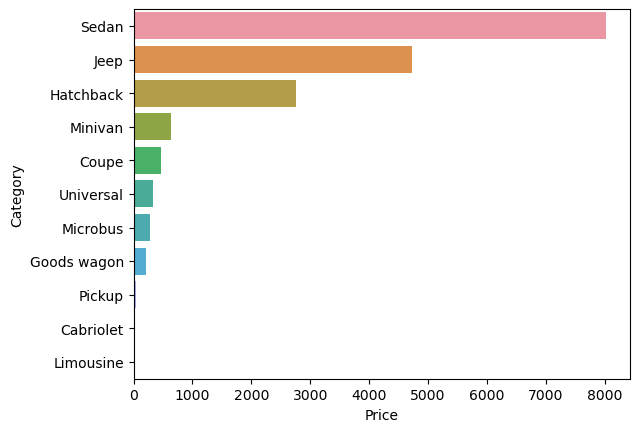

In [268]:
sns.barplot(data=popular_model,y=popular_model.index,x='Price');

#### Sedan and jeep are most popular cars. This might be due to their comparitevely lower price than minivans and universals

### Maximum mileage by fuel type

In [277]:
mileage=deleted_df.groupby('Fuel type')[['Mileage']].median().sort_values(by='Mileage',ascending=False)

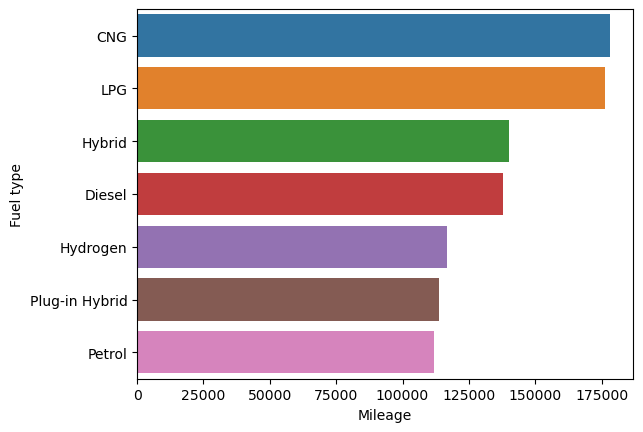

In [280]:
sns.barplot(data=mileage,y=mileage.index,x='Mileage');

## Popularity of fuel type

In [287]:
fuel_pop=deleted_df.groupby('Fuel type')[['Price']].count().sort_values(by='Price',ascending=False)
fuel_pop

,Price
Fuel type,
Petrol,9362
Diesel,3596
Hybrid,3383
LPG,632
CNG,469
Plug-in Hybrid,84
Hydrogen,1


In [286]:
import plotly.express as px
ax2= px.treemap(deleted_df,path=['Fuel type'],title="Popularity of the Fuel Type:")
ax2.show()

### Recent trend in hybrid cars

In [299]:
hybrid=deleted_df[deleted_df['Fuel type']=='Hybrid'][['Prod. year','Fuel type']]
hybrid

,Prod. year,Fuel type
0,2010,Hybrid
3,2011,Hybrid
6,2010,Hybrid
13,2013,Hybrid
19,2008,Hybrid
...,...,...
19214,2010,Hybrid
19219,2013,Hybrid
19229,2008,Hybrid
19230,2011,Hybrid


In [321]:
hybrid_count=hybrid.groupby('Prod. year')[['Fuel type']].count()
hybrid_count.columns=['Hybrid count']

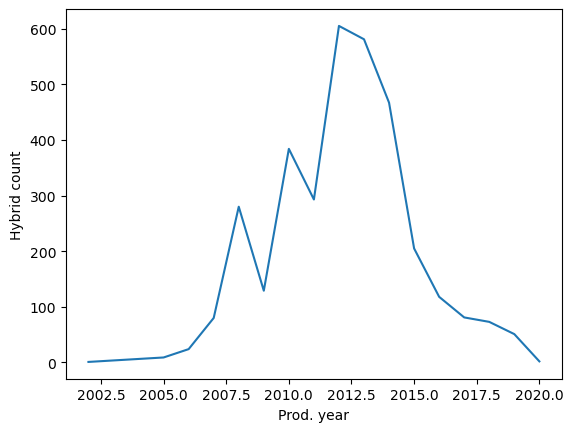

In [323]:
sns.lineplot(data=hybrid_count,x='Prod. year',y='Hybrid count');

### Recent trends in CNG

In [313]:
CNG=deleted_df[deleted_df['Fuel type']=='CNG'][['Prod. year','Fuel type']]

In [312]:
CNG_count=CNG.groupby('Prod. year')[['Fuel type']].count()

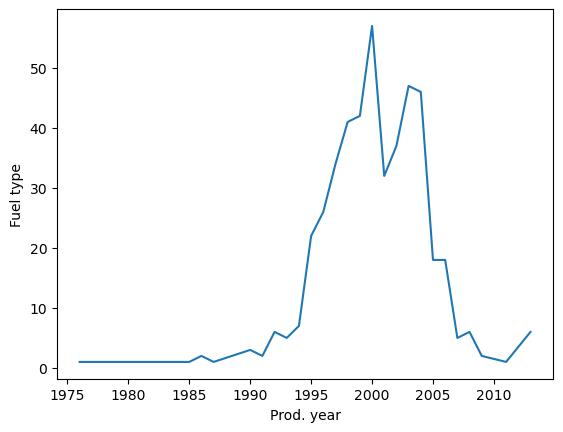

In [314]:
sns.lineplot(data=CNG_count,x='Prod. year',y='Fuel type');

### Recent trends in Plug_in_Hybrid

In [329]:
Plug_in_Hybrid=deleted_df[deleted_df['Fuel type']=='Plug-in Hybrid'][['Prod. year','Fuel type']]

In [330]:
Plug_in_Hybrid_count=Plug_in_Hybrid.groupby('Prod. year')[['Fuel type']].count()

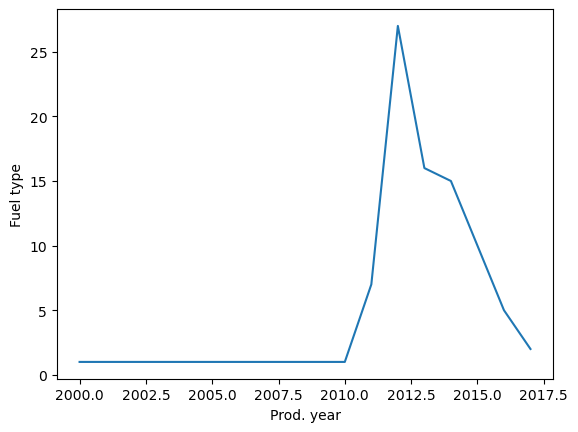

In [331]:
sns.lineplot(data=Plug_in_Hybrid_count,x='Prod. year',y='Fuel type');

In [325]:
deleted_df['Fuel type'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

### Recent trends in LPG

In [332]:
LPG=deleted_df[deleted_df['Fuel type']=='LPG'][['Prod. year','Fuel type']]

In [333]:
LPG_count=LPG.groupby('Prod. year')[['Fuel type']].count()

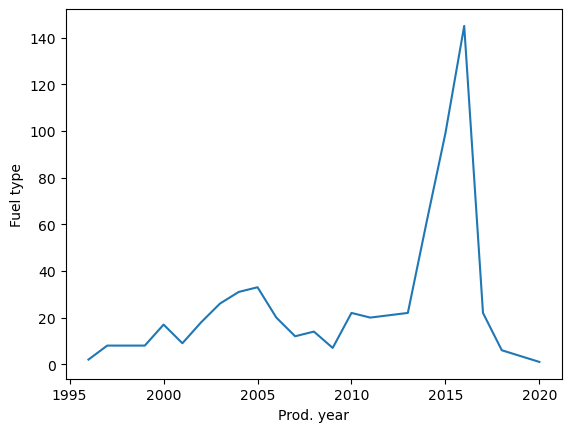

In [334]:
sns.lineplot(data=LPG_count,x='Prod. year',y='Fuel type');

### Recent trends in Petrol

In [336]:
Petrol=deleted_df[deleted_df['Fuel type']=='Petrol'][['Prod. year','Fuel type']]

In [337]:
Petrol_count=Petrol.groupby('Prod. year')[['Fuel type']].count()

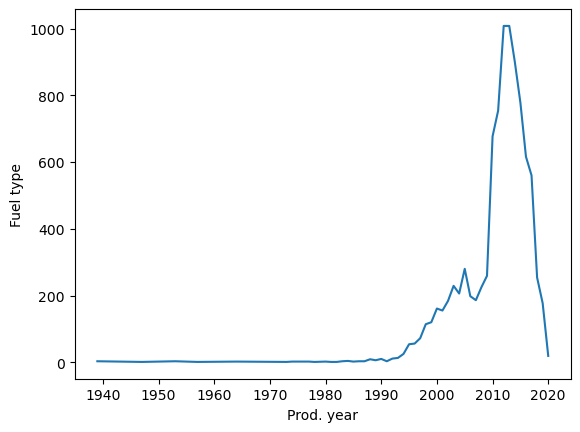

In [338]:
sns.lineplot(data=Petrol_count,x='Prod. year',y='Fuel type');

### Recent trends in Diesel

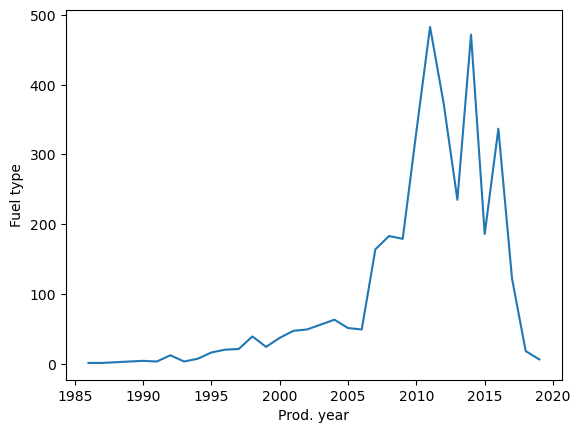

In [339]:
Diesel=deleted_df[deleted_df['Fuel type']=='Diesel'][['Prod. year','Fuel type']]

Diesel_count=Diesel.groupby('Prod. year')[['Fuel type']].count()

sns.lineplot(data=Diesel_count,x='Prod. year',y='Fuel type');

In [ ]:
# Top 10 manufacterers

In [349]:
top_manf=deleted_df['Manufacturer'].value_counts().sort_values(ascending = False)[:10]
top_manf=pd.DataFrame(top_manf)
top_manf

,Manufacturer
TOYOTA,3392
HYUNDAI,3199
MERCEDES-BENZ,1840
CHEVROLET,1042
FORD,1032
BMW,943
HONDA,909
LEXUS,837
NISSAN,653
VOLKSWAGEN,572


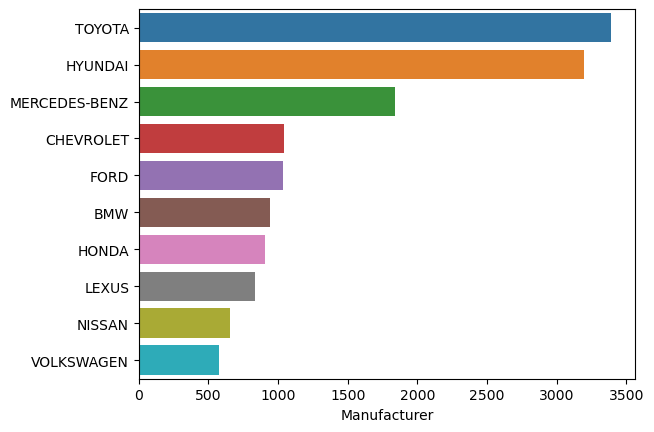

In [353]:
sns.barplot(data=top_manf,y=top_manf.index,x='Manufacturer');

### Summary:

1. The trend shows that cleaner fuels still struggle to capture market when compared to petrol and diesel
2. The significant drop in vehicle sales is clearly visible in covid.
3. Hybrid cars are performing poorly in markegt as they struggle to make sales in recent years.
4. LPG is the only promising alternative to petrol and diesel
5. Sedan remains the most popular car choice.
6. Toyota remains the most popular manufacturer.

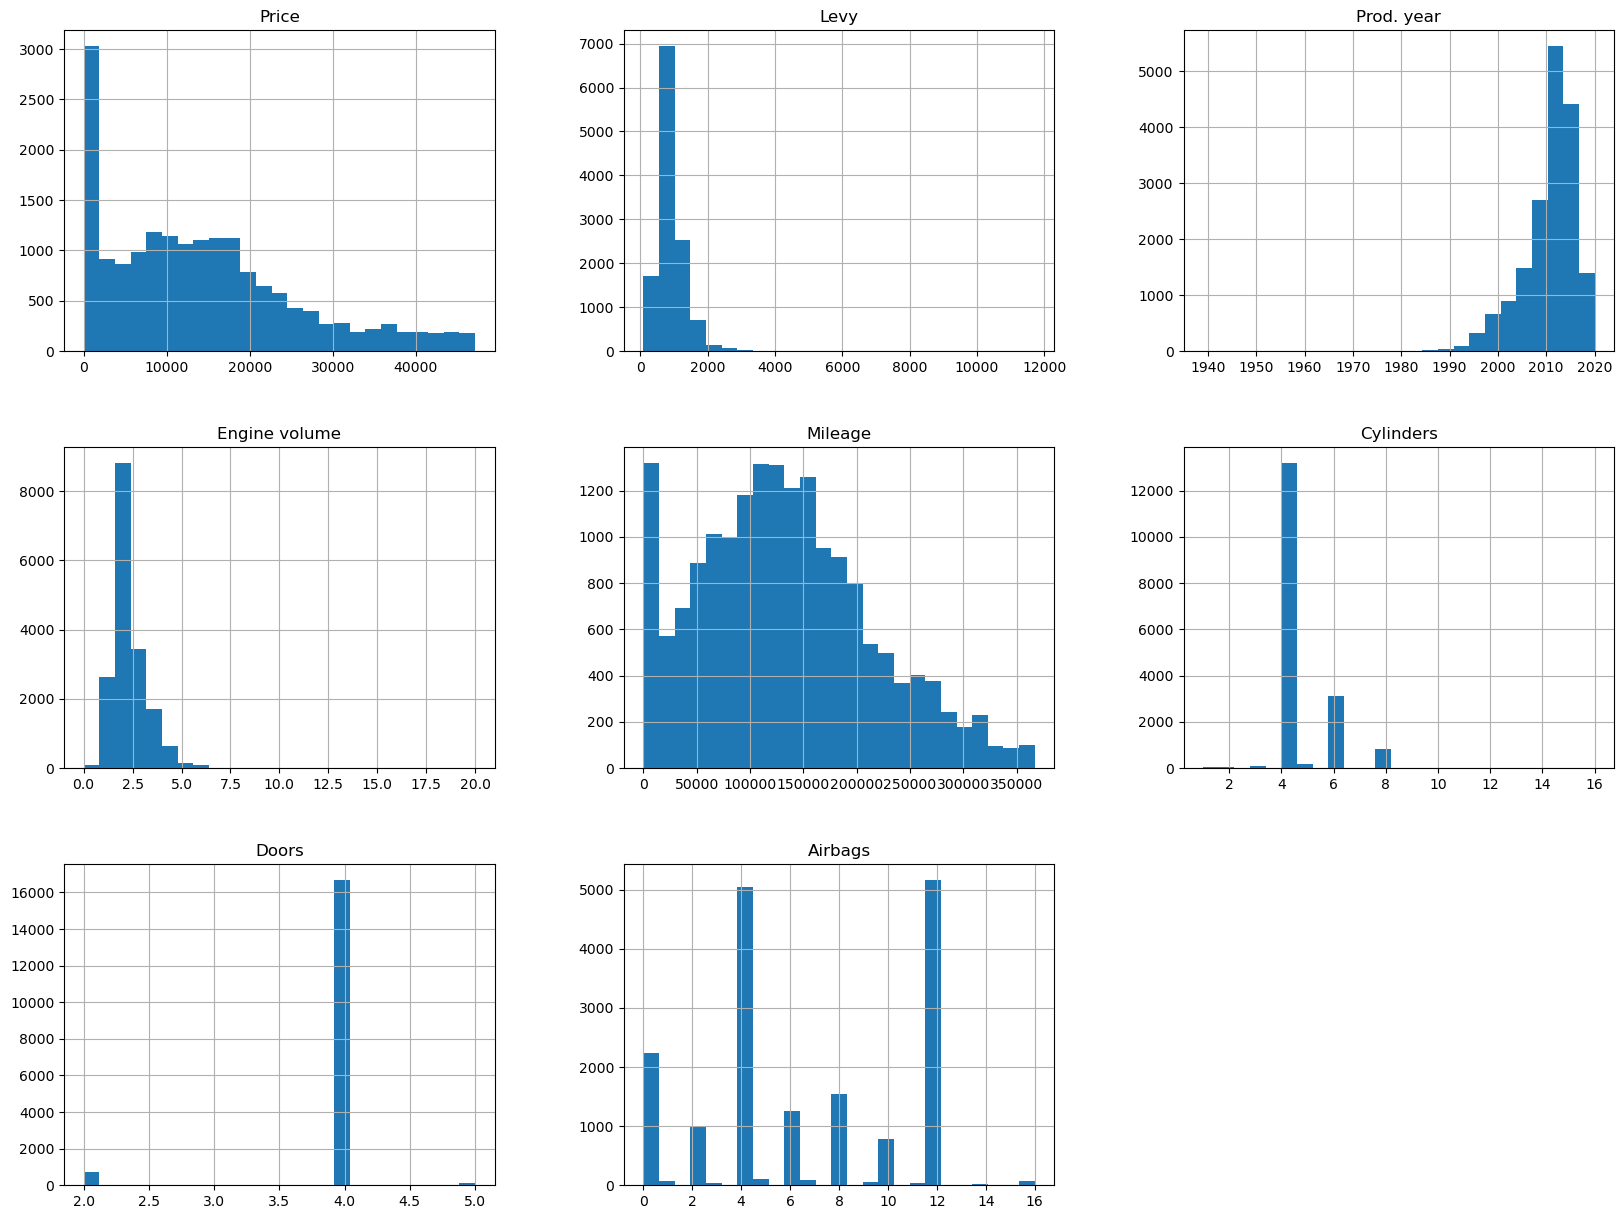

In [354]:
%matplotlib inline

deleted_df.hist(bins=25, figsize=(20,15))
plt.show()

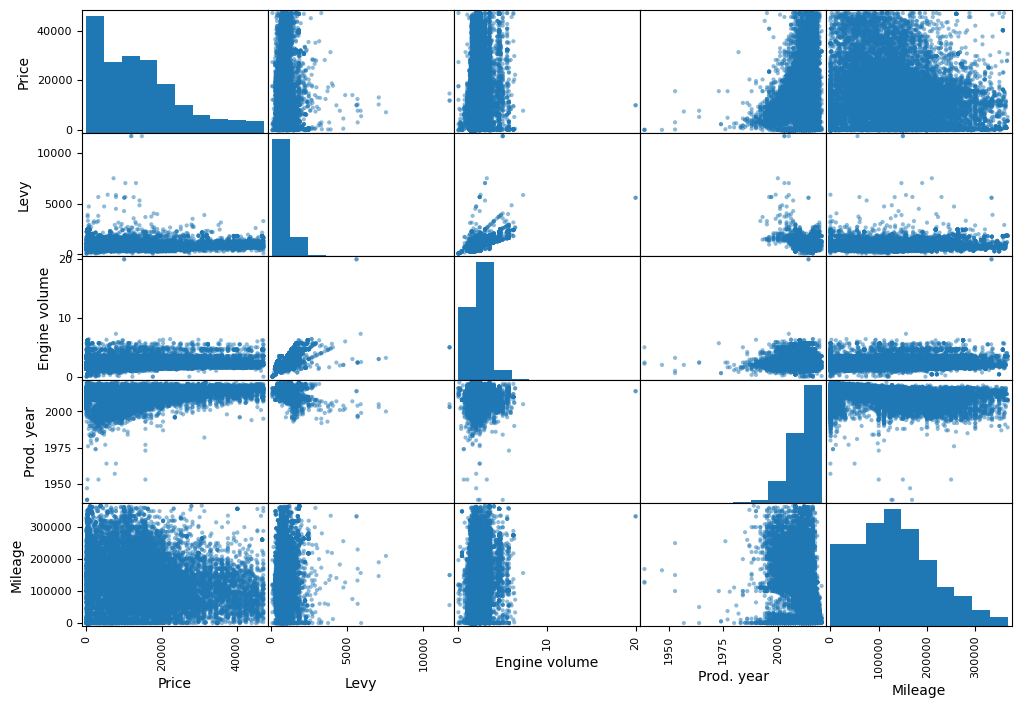

In [355]:
attributes = ['Price','Levy','Engine volume','Prod. year','Mileage']
scatter_matrix(deleted_df[attributes], figsize=(12,8))
plt.show()

There positive correlation between Engine volume and Levy and slightly negative correlation between Levy and Prod. year. Let's check the actual correlation scores between those attributes.

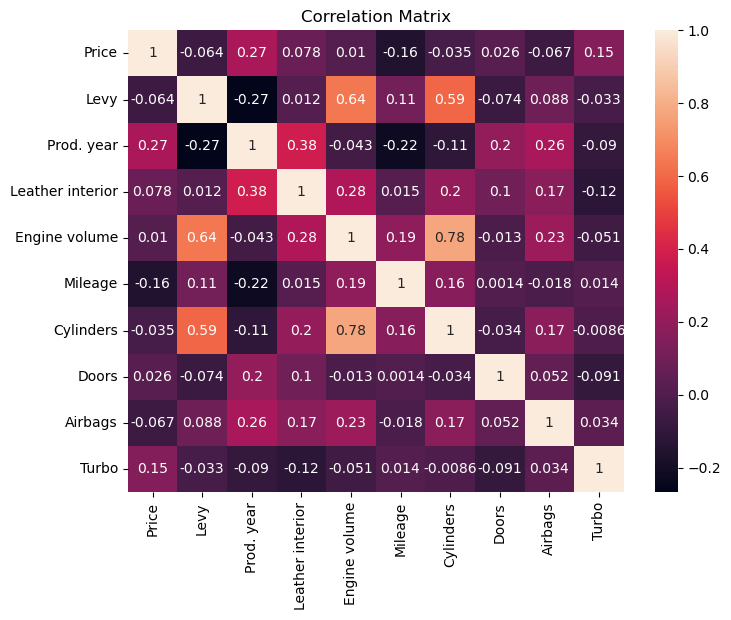

In [356]:
plt.figure(figsize=(8,6))
sns.heatmap(deleted_df.corr(),annot=True, cbar = True)
plt.title('Correlation Matrix')
plt.show()

The assumptions we made from scatter plot seems quite correct! The correliation between Levy and Engine volume 0.64 (not bad!). Engine volume and Cylinders has quite strong relationship which is 0.78 

In [357]:
num_attribs = ['Levy','Prod. year', 'Engine volume','Doors', 'Mileage', 'Cylinders', 'Airbags']
cat_attribs = ['Manufacturer','Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo']

In [358]:
num_cars = deleted_df[num_attribs]
y = deleted_df['Price']
cat_cars = deleted_df[cat_attribs]

In [359]:
Imputer = SimpleImputer(strategy='median')

Imputer.fit(num_cars)
# Displaying medians of every numveric column we have
display(Imputer.statistics_)
num_cars = Imputer.transform(num_cars)

array([7.79000e+02, 2.01200e+03, 2.00000e+00, 4.00000e+00, 1.26265e+05,
       4.00000e+00, 6.00000e+00])

In [360]:
scaler = StandardScaler()
num_cars = scaler.fit_transform(num_cars)

In [361]:
num_cars

array([[ 1.37160845, -0.1217927 ,  1.41203665, ...,  0.65905288,
         1.24261819,  1.24708939],
       [ 0.40211876,  0.05745498,  0.83329684, ...,  0.73275   ,
         1.24261819,  0.32314571],
       [-0.20603881, -0.8387834 , -1.13441853, ...,  0.83109479,
        -0.47689618, -1.06276982],
       ...,
       [-0.06099705, -0.1217927 , -0.32418279, ..., -0.19703846,
        -0.47689618, -0.60079798],
       [ 1.0891587 , -0.65953572, -0.32418279, ..., -0.99740519,
        -0.47689618, -0.60079798],
       [-0.27219821,  0.23670266,  0.13880906, ...,  0.67033795,
        -0.47689618,  1.24708939]])

# Using Pipeline

In [362]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())])

# Using Column Transformer

In [363]:
full_pipeline = ColumnTransformer([
    ('num',num_pipeline, num_attribs),
    ('cat',OneHotEncoder(), cat_attribs)  
])
cars_prepared = full_pipeline.fit_transform(deleted_df)

In [364]:
from sklearn import set_config
set_config(display='diagram')
display(full_pipeline)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['Levy', 'Prod. year', 'Engine volume',
                                  'Doors', 'Mileage', 'Cylinders', 'Airbags']),
                                ('cat', OneHotEncoder(),
                                 ['Manufacturer', 'Category',
                                  'Leather interior', 'Fuel type',
                                  'Gear box type', 'Drive wheels', 'Wheel',
                                  'Color', 'Turbo'])])

In [365]:
cars_prepared.shape

(17527, 114)

In [366]:
deleted_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,8467,NaN,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False


In [367]:
X_train, X_test, y_train, y_test = train_test_split(cars_prepared, y, test_size=0.33, random_state = 123)

# Model Setup, Hyperparameter Tuning and Model Evaluation

In [368]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [378]:
# Training rmse
predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9216.571396618881

In [379]:
# Testing rmse
predictions1 = lin_reg.predict(X_test)
lin_mse1 = mean_squared_error(y_test, predictions1)
lin_rmse1 = np.sqrt(lin_mse1)
lin_rmse1

9168.93626962951

In [380]:
# Training mae
mae = mean_absolute_error(y_train, predictions)
mae

7129.708581100996

In [381]:
# Testing mae
mae1 = mean_absolute_error(y_test, predictions1)
mae1

7105.10425668758

In [387]:
# Rsme cross validation
lin_scores = cross_val_score(lin_reg, cars_prepared, y, scoring='neg_mean_squared_error', cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([9172.28997118, 9425.21051651, 9099.45543781, 9157.93510319,
       9345.46220726])

In [398]:
mean_lin=lin_rmse_scores.mean()
mean_lin

9240.07064719123

## Trying Decision Tree

In [372]:
tree_reg = DecisionTreeRegressor(random_state = 123)

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

In [382]:
# Training rmse
tree_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

995.1400359363548

In [385]:
# Rmse with cross validation
scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([7454.58364456, 7298.07276603, 7704.87808287, 7407.14703388,
       7713.85297711])

In [384]:
scores1 = cross_val_score(tree_reg, cars_prepared, y, scoring='neg_mean_squared_error', cv=5)

tree_rmse_scores1 = np.sqrt(-scores1)
tree_rmse_scores1

array([7315.63618519, 7846.70097351, 7699.75008304, 7040.48659794,
       7565.37086738])

In [396]:
mean_rmse_tree=tree_rmse_scores1.mean()
mean_rmse_tree

7493.588941410529

In [386]:
scores2 = cross_val_score(tree_reg, X_test, y_test, scoring='neg_mean_squared_error', cv=5)

tree_rmse_scores2 = np.sqrt(-scores2)
tree_rmse_scores2

array([8218.72125648, 8997.66820927, 8902.84353738, 8501.512053  ,
       8499.35926972])

### Trying Random Forest

In [388]:
forest_reg = RandomForestRegressor(n_estimators = 100, random_state=123)

forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [390]:
# Rsme 
forest_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2297.021106042258

In [391]:
# Rsme cross validation
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([5780.25626157, 5684.29515446, 5546.55824399, 5652.49716654,
       6005.14956653])

In [394]:
mean_rmse_RaFo=forest_rmse_scores.mean()

In [147]:
forest_scores1 = cross_val_score(forest_reg, cars_prepared, y,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores1 = np.sqrt(-forest_scores1)
forest_rmse_scores1

array([5615.88672931, 5949.50316465, 5576.55888335, 5286.55735837,
       5599.42903479])

In [411]:
scores_final=[mean_lin,mean_rmse_tree,mean_rmse_RaFo]
scores_final=pd.DataFrame(scores_final)
scores_final.index=['linear reg.','Dec. tree','Random for.']
scores_final.columns=['RMSE']
scores_final

,RMSE
linear reg.,9240.070647
Dec. tree,7493.588941
Random for.,5733.751279


<AxesSubplot:ylabel='RMSE'>

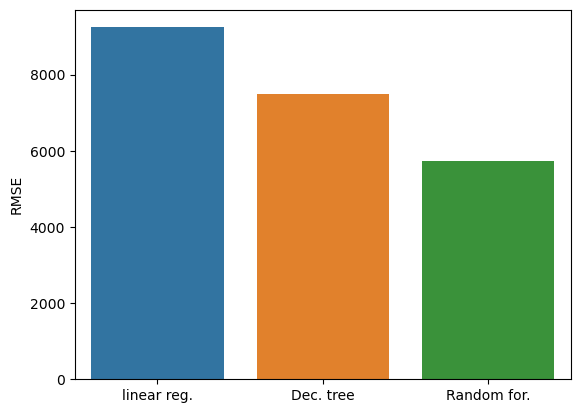

In [412]:
sns.barplot(data=scores_final,x=scores_final.index,y='RMSE')

#### Summary: Minimum Rmse observed for random forest, lets move ahead with it and tune its hyperpartameters

### Hyperparameter tuning and Extracting feature importance

In [413]:
feature_importance_values= forest_reg.feature_importances_
feature_importances = pd.DataFrame(feature_importance_values)

In [414]:
feature_importances.shape

(114, 1)

In [415]:
X_train.shape

(11743, 114)

In [416]:
param_grid = [
    {'n_estimators': [100, 200], 'max_features': [35,33,31]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [35, 33, 31],
                          'n_estimators': [100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [417]:
grid_search.best_params_

{'max_features': 35, 'n_estimators': 200}

In [418]:
cvres = grid_search.cv_results_

In [419]:
cvdf=pd.DataFrame(cvres)
cvdf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.658496,0.085301,0.049578,0.002465,35,100,"{'max_features': 35, 'n_estimators': 100}",-3.096679e+07,-3.184477e+07,-2.976736e+07,...,-3.141774e+07,1.723012e+06,4,-5.016629e+06,-5.236525e+06,-5.198066e+06,-5.202669e+06,-5.071674e+06,-5.145113e+06,85292.675968
1,25.493378,0.047651,0.097310,0.001082,35,200,"{'max_features': 35, 'n_estimators': 200}",-3.073449e+07,-3.145867e+07,-2.959573e+07,...,-3.124028e+07,1.666043e+06,1,-4.889166e+06,-5.130924e+06,-5.113063e+06,-5.123057e+06,-5.005621e+06,-5.052366e+06,93457.996117
2,12.205605,0.061513,0.049196,0.000498,33,100,"{'max_features': 33, 'n_estimators': 100}",-3.090362e+07,-3.163441e+07,-3.025465e+07,...,-3.143783e+07,1.496861e+06,5,-5.009394e+06,-5.220918e+06,-5.217110e+06,-5.254496e+06,-5.081035e+06,-5.156591e+06,94616.836041
3,24.586540,0.165403,0.101604,0.008033,33,200,"{'max_features': 33, 'n_estimators': 200}",-3.085403e+07,-3.148681e+07,-2.990922e+07,...,-3.129281e+07,1.505072e+06,2,-4.895738e+06,-5.124708e+06,-5.132844e+06,-5.120182e+06,-5.002711e+06,-5.055237e+06,93022.468128
4,12.126451,0.175527,0.058988,0.020133,31,100,"{'max_features': 31, 'n_estimators': 100}",-3.081837e+07,-3.149753e+07,-3.017001e+07,...,-3.145147e+07,1.662553e+06,6,-5.019609e+06,-5.193383e+06,-5.201272e+06,-5.243844e+06,-5.136770e+06,-5.158976e+06,77577.799130
5,24.569272,1.356578,0.107163,0.011941,31,200,"{'max_features': 31, 'n_estimators': 200}",-3.091863e+07,-3.159350e+07,-3.016173e+07,...,-3.139011e+07,1.520201e+06,3,-4.893799e+06,-5.102091e+06,-5.092818e+06,-5.118935e+06,-5.018896e+06,-5.045308e+06,83132.393835


In [420]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5605.153105055072 {'max_features': 35, 'n_estimators': 100}
5589.300388047561 {'max_features': 35, 'n_estimators': 200}
5606.944440610192 {'max_features': 33, 'n_estimators': 100}
5593.997639552287 {'max_features': 33, 'n_estimators': 200}
5608.1611045576665 {'max_features': 31, 'n_estimators': 100}
5602.688100289354 {'max_features': 31, 'n_estimators': 200}


In [421]:
grid_search.best_estimator_

RandomForestRegressor(max_features=35, n_estimators=200, random_state=42)

In [422]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.94724011e-02, 1.62228218e-01, 6.13769145e-02, 3.64006556e-03,
       1.14064473e-01, 1.95449865e-02, 1.06661236e-01, 6.82440121e-05,
       9.86699482e-06, 1.63289488e-03, 5.64336952e-03, 5.38303432e-05,
       1.94729309e-04, 4.42824602e-03, 3.81707074e-05, 1.63357086e-05,
       7.03156398e-04, 3.35482337e-05, 1.88029563e-04, 1.28510991e-04,
       2.93781821e-03, 3.36034780e-05, 6.58444758e-05, 1.76299413e-06,
       0.00000000e+00, 3.19957762e-03, 3.86064851e-04, 2.88057610e-02,
       3.35357942e-04, 3.90113847e-06, 1.03336655e-03, 2.35713826e-03,
       2.78370693e-03, 0.00000000e+00, 1.52880538e-04, 6.56262795e-03,
       1.66191264e-04, 4.07005783e-04, 7.36492158e-04, 7.31888124e-03,
       2.47032237e-05, 9.60733318e-05, 6.57045339e-04, 2.20217267e-05,
       1.83114336e-03, 4.40004725e-04, 1.93433925e-05, 0.00000000e+00,
       9.97284873e-04, 8.79709869e-05, 1.38198760e-05, 1.87512123e-06,
       1.27744119e-06, 0.00000000e+00, 2.29347488e-05, 6.19045277e-06,
      

In [423]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_encoder

OneHotEncoder()

In [424]:
cat_encoder.categories_

[array(['ACURA', 'ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC',
        'CHEVROLET', 'CHRYSLER', 'CITROEN', 'DAEWOO', 'DAIHATSU', 'DODGE',
        'FIAT', 'FORD', 'GAZ', 'GMC', 'GREATWALL', 'HAVAL', 'HONDA',
        'HUMMER', 'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
        'LANCIA', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI', 'MAZDA',
        'MERCEDES-BENZ', 'MERCURY', 'MINI', 'MITSUBISHI', 'MOSKVICH',
        'NISSAN', 'OPEL', 'PEUGEOT', 'PONTIAC', 'PORSCHE', 'RENAULT',
        'ROLLS-ROYCE', 'ROVER', 'SAAB', 'SATURN', 'SCION', 'SEAT', 'SKODA',
        'SSANGYONG', 'SUBARU', 'SUZUKI', 'TOYOTA', 'UAZ', 'VAZ',
        'VOLKSWAGEN', 'VOLVO', 'ZAZ', 'სხვა'], dtype=object),
 array(['Cabriolet', 'Coupe', 'Goods wagon', 'Hatchback', 'Jeep',
        'Limousine', 'Microbus', 'Minivan', 'Pickup', 'Sedan', 'Universal'],
       dtype=object),
 array([False,  True]),
 array(['CNG', 'Diesel', 'Hybrid', 'Hydrogen', 'LPG', 'Petrol',
        'Plug-in Hybrid'], dtype=object),
 ar

In [425]:
cat_one_hot_attribs = [i  for cat in cat_encoder.categories_ for i in cat]
cat_one_hot_attribs 

['ACURA',
 'ALFA ROMEO',
 'AUDI',
 'BMW',
 'BUICK',
 'CADILLAC',
 'CHEVROLET',
 'CHRYSLER',
 'CITROEN',
 'DAEWOO',
 'DAIHATSU',
 'DODGE',
 'FIAT',
 'FORD',
 'GAZ',
 'GMC',
 'GREATWALL',
 'HAVAL',
 'HONDA',
 'HUMMER',
 'HYUNDAI',
 'INFINITI',
 'ISUZU',
 'JAGUAR',
 'JEEP',
 'KIA',
 'LANCIA',
 'LAND ROVER',
 'LEXUS',
 'LINCOLN',
 'MASERATI',
 'MAZDA',
 'MERCEDES-BENZ',
 'MERCURY',
 'MINI',
 'MITSUBISHI',
 'MOSKVICH',
 'NISSAN',
 'OPEL',
 'PEUGEOT',
 'PONTIAC',
 'PORSCHE',
 'RENAULT',
 'ROLLS-ROYCE',
 'ROVER',
 'SAAB',
 'SATURN',
 'SCION',
 'SEAT',
 'SKODA',
 'SSANGYONG',
 'SUBARU',
 'SUZUKI',
 'TOYOTA',
 'UAZ',
 'VAZ',
 'VOLKSWAGEN',
 'VOLVO',
 'ZAZ',
 'სხვა',
 'Cabriolet',
 'Coupe',
 'Goods wagon',
 'Hatchback',
 'Jeep',
 'Limousine',
 'Microbus',
 'Minivan',
 'Pickup',
 'Sedan',
 'Universal',
 False,
 True,
 'CNG',
 'Diesel',
 'Hybrid',
 'Hydrogen',
 'LPG',
 'Petrol',
 'Plug-in Hybrid',
 'Automatic',
 'Manual',
 'Tiptronic',
 'Variator',
 '4x4',
 'Front',
 'Rear',
 'Left wheel',
 'Right

In [426]:
len(cat_one_hot_attribs)

107

In [427]:
attributes = num_attribs +  cat_one_hot_attribs
attributes

['Levy',
 'Prod. year',
 'Engine volume',
 'Doors',
 'Mileage',
 'Cylinders',
 'Airbags',
 'ACURA',
 'ALFA ROMEO',
 'AUDI',
 'BMW',
 'BUICK',
 'CADILLAC',
 'CHEVROLET',
 'CHRYSLER',
 'CITROEN',
 'DAEWOO',
 'DAIHATSU',
 'DODGE',
 'FIAT',
 'FORD',
 'GAZ',
 'GMC',
 'GREATWALL',
 'HAVAL',
 'HONDA',
 'HUMMER',
 'HYUNDAI',
 'INFINITI',
 'ISUZU',
 'JAGUAR',
 'JEEP',
 'KIA',
 'LANCIA',
 'LAND ROVER',
 'LEXUS',
 'LINCOLN',
 'MASERATI',
 'MAZDA',
 'MERCEDES-BENZ',
 'MERCURY',
 'MINI',
 'MITSUBISHI',
 'MOSKVICH',
 'NISSAN',
 'OPEL',
 'PEUGEOT',
 'PONTIAC',
 'PORSCHE',
 'RENAULT',
 'ROLLS-ROYCE',
 'ROVER',
 'SAAB',
 'SATURN',
 'SCION',
 'SEAT',
 'SKODA',
 'SSANGYONG',
 'SUBARU',
 'SUZUKI',
 'TOYOTA',
 'UAZ',
 'VAZ',
 'VOLKSWAGEN',
 'VOLVO',
 'ZAZ',
 'სხვა',
 'Cabriolet',
 'Coupe',
 'Goods wagon',
 'Hatchback',
 'Jeep',
 'Limousine',
 'Microbus',
 'Minivan',
 'Pickup',
 'Sedan',
 'Universal',
 False,
 True,
 'CNG',
 'Diesel',
 'Hybrid',
 'Hydrogen',
 'LPG',
 'Petrol',
 'Plug-in Hybrid',
 'Automatic

In [428]:
zip(feature_importances, attributes)

In [429]:
list(zip(feature_importances, attributes))

[(0.06947240110283213, 'Levy'),
 (0.16222821803285245, 'Prod. year'),
 (0.061376914505837266, 'Engine volume'),
 (0.0036400655610590213, 'Doors'),
 (0.11406447328306066, 'Mileage'),
 (0.019544986498590513, 'Cylinders'),
 (0.10666123617296097, 'Airbags'),
 (6.824401207973895e-05, 'ACURA'),
 (9.866994821853237e-06, 'ALFA ROMEO'),
 (0.0016328948791278534, 'AUDI'),
 (0.005643369515843506, 'BMW'),
 (5.3830343180929005e-05, 'BUICK'),
 (0.0001947293085224827, 'CADILLAC'),
 (0.00442824601704801, 'CHEVROLET'),
 (3.817070741856645e-05, 'CHRYSLER'),
 (1.6335708604979542e-05, 'CITROEN'),
 (0.0007031563975169652, 'DAEWOO'),
 (3.354823369164094e-05, 'DAIHATSU'),
 (0.0001880295630971723, 'DODGE'),
 (0.00012851099141866098, 'FIAT'),
 (0.0029378182067385005, 'FORD'),
 (3.360347796269391e-05, 'GAZ'),
 (6.584447584873386e-05, 'GMC'),
 (1.7629941270700914e-06, 'GREATWALL'),
 (0.0, 'HAVAL'),
 (0.003199577622047685, 'HONDA'),
 (0.0003860648509223353, 'HUMMER'),
 (0.02880576099864349, 'HYUNDAI'),
 (0.0003353

In [430]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.16222821803285245, 'Prod. year'),
 (0.11406447328306066, 'Mileage'),
 (0.10666123617296097, 'Airbags'),
 (0.06947240110283213, 'Levy'),
 (0.061376914505837266, 'Engine volume'),
 (0.060392968321859065, 'Diesel'),
 (0.036292755395727495, 'Tiptronic'),
 (0.02880576099864349, 'HYUNDAI'),
 (0.02447151552525159, 'Automatic'),
 (0.023294992090805034, 'SSANGYONG'),
 (0.019544986498590513, 'Cylinders'),
 (0.019094152758166442, 'Sedan'),
 (0.01711112825196807, 'Jeep'),
 (0.015229080814674518, False),
 (0.01482844293802825, True),
 (0.014237762684945338, 'Front'),
 (0.012764262163777015, True),
 (0.012632612830036057, 'TOYOTA'),
 (0.012417781667569999, False),
 (0.010904544507763732, 'Black'),
 (0.009867545588716014, 'White'),
 (0.009764591684842349, 'Petrol'),
 (0.008982433760085267, 'Silver'),
 (0.008916379884388545, 'Hybrid'),
 (0.008767703396986662, '4x4'),
 (0.007318881237987121, 'MERCEDES-BENZ'),
 (0.007172241463251212, 'Grey'),
 (0.0065626279453928765, 'LEXUS'),
 (0.005887059508549772

In [431]:
feature_imp1=sorted(zip(feature_importances, attributes), reverse=True)

In [432]:
feature_imp1=pd.DataFrame(feature_imp1)

In [433]:
feature_imp1

,0,1
0,0.162228,Prod. year
1,0.114064,Mileage
2,0.106661,Airbags
3,0.069472,Levy
4,0.061377,Engine volume
...,...,...
109,0.000000,SATURN
110,0.000000,PONTIAC
111,0.000000,LANCIA
112,0.000000,Hydrogen


In [434]:
top10_features=feature_imp1.head(10)
top10_features.rename(columns = {0:'Feature',1:'Importance'}, inplace = True)
top10_features

,Feature,Importance
0,0.162228,Prod. year
1,0.114064,Mileage
2,0.106661,Airbags
3,0.069472,Levy
4,0.061377,Engine volume
5,0.060393,Diesel
6,0.036293,Tiptronic
7,0.028806,HYUNDAI
8,0.024472,Automatic
9,0.023295,SSANGYONG


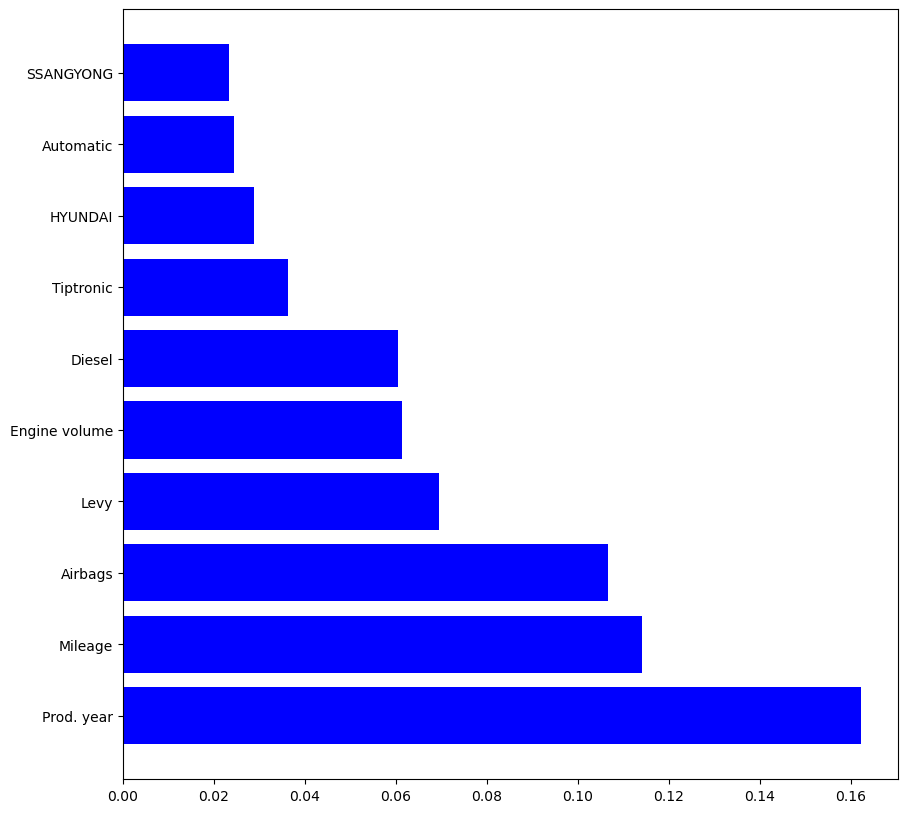

In [435]:
plt.figure(figsize = (10, 10))
plt.barh(top10_features.Importance,top10_features.Feature, color ='blue');

In [436]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

5761.036495090154

In [437]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([5506.64790839, 6004.65750968])

In [438]:
# Save the model we trained
joblib.dump(final_model, "final_model.pkl")

# If you want to use this model all you need to do is:
# joblib.load('final_model.pkl')

['final_model.pkl']